# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from pymystem3 import Mystem
m = Mystem()

In [5]:
try:
    data = pd.read_csv('/datasets/data.csv')
    pd.set_option('display.max_columns', None)
    pd.options.mode.chained_assignment = None
except:
    data = pd.read_csv('data.csv')
    pd.set_option('display.max_columns', None)
    pd.options.mode.chained_assignment = None

In [9]:
def info_row(df):
    '''
        Input: df - таблица pd.DataFrame.
        Output: None.
        Description: Функция первичного знакомства с данными.

        '''
    
    display(df.head(10))
    print('Общая информация:')
    display(df.info())
    print('Общая статистика:')
    display(df.describe())
    print('Дубликаты:')
    display(df.duplicated().sum())
    print(f'{df.duplicated().sum()/len(df):.1%}')
    print('Пропуски:')
    for col in df.columns:
        pct_missing = np.mean(df[col].isna())
        print('{} - {}%'.format(col, round(pct_missing*100,2)))
    print('Уникальные значения столбцов:')
    for row in df.columns:
        print('Уникальные значения столбца', row)
        print(df[row].unique())
    print('Матрица диаграмм:')
    pd.plotting.scatter_matrix(df,figsize=(10,10))
    plt.suptitle("Матрица диаграмм зависимостей", size=20)
    plt.show()
    print('Heatmap корреляций:')
    plt.figure(figsize=(10, 10))
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG') 
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);
    plt.show()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


None

Общая статистика:


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Дубликаты:


54

0.3%
Пропуски:
children - 0.0%
days_employed - 10.1%
dob_years - 0.0%
education - 0.0%
education_id - 0.0%
family_status - 0.0%
family_status_id - 0.0%
gender - 0.0%
income_type - 0.0%
debt - 0.0%
total_income - 10.1%
purpose - 0.0%
Уникальные значения столбцов:
Уникальные значения столбца children
[ 1  0  3  2 -1  4 20  5]
Уникальные значения столбца days_employed
[-8437.67302776 -4024.80375385 -5623.42261023 ... -2113.3468877
 -3112.4817052  -1984.50758853]
Уникальные значения столбца dob_years
[42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51  0 59 29 60 55 58
 71 22 73 66 69 19 72 70 74 75]
Уникальные значения столбца education
['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']
Уникальные значения столбца education_id
[0 1 2 3 4]
Уникальные зна

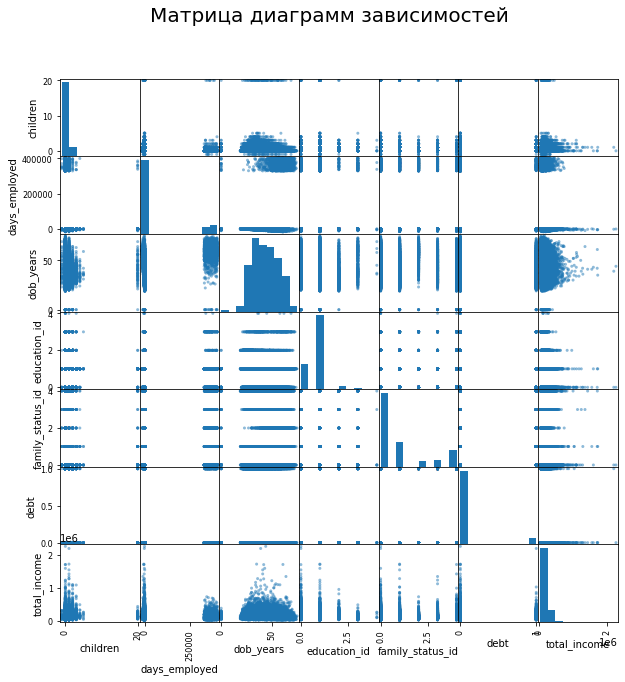

Heatmap корреляций:


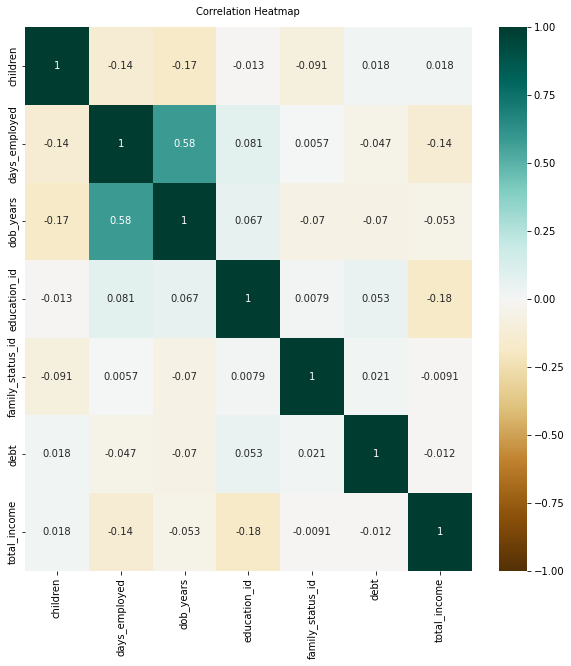

In [12]:
info_row(data)

**Выводы на основании изучения общей информации**                                                                                
*В таблице двенадцать столбцов.  
Согласно документации к данным:*
* `children` — *количество детей в семье <font color='red'>(в столбце имеются ошибки записи, а именно  '20' и '-1' по 76 и 47 значений соответственно);</font>*
* `days_employed` — *общий трудовой стаж в днях <font color='red'>(в столбце пропуски значений в количестве '2174', а так же отрицательные значения);</font>*  
* `dob_years` — *возраст клиента в годах <font color='red'>(имеются нулевые значения в колличестве '101');</font>*
* `education` — *уровень образования клиента <font color='red'>(имеются явные дубликаты ввиду того, что использованы строчные и прописные символы);</font>*
* `education_id` — *идентификатор уровня образования;*
* `family_status` — *семейное положение;*
* `family_status_id` — *идентификатор семейного положения;* 
* `gender` — *пол клиента <font color='red'>(имеет одно пропущенное значение, данную строку следует удалить);</font>*
* `income_type` — *тип занятости;*
* `debt` — *имел ли задолженность по возврату кредитов;*
* `total_income` — *ежемесячный доход <font color='red'>(в столбце имеются пропуски значений в колличестве '2174');</font>*
* `purpose` — *цель получения кредита <font color='red'>(имеются неявные дубликаты)</font>*   

## Шаг 2. Предобработка данных

### Обработка пропусков

*Начинаем обработку с первого столбца `children`. Согласно информации, полученной на первом этапе двадцать детей у 76 клиентов, а минус один у сорока семи. Двадцать детей само по себе большая редкость, но у 76 клиентов одного банка - это за гранью реальности, ну а про минус один можно не уточнять,так что в данном случае к ошибочным значениям привел человеческий фактор,меняем на значения ближе подходящие по смыслу '20' - на '2' и '-1' на '1' соответственно*

In [13]:
data['children'] = data['children'].replace(20, 2)
data['children'] = data['children'].replace(-1, 1)
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

*Так как в столбце `gender`вместо пола клиента указана аббревиатура `XNA`, что с высокой вероятностью соответсвует пропущенному по случайным обстоятельствам значению. Всего одно значение, которое не повлияет на решение поставленных задач. Необходимо удалить данную строку, для того, чтобы избежать лишних манипуляций с ней.*

In [14]:
data = data[data['gender'] != 'XNA']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21524 non-null  int64  
 1   days_employed     19350 non-null  float64
 2   dob_years         21524 non-null  int64  
 3   education         21524 non-null  object 
 4   education_id      21524 non-null  int64  
 5   family_status     21524 non-null  object 
 6   family_status_id  21524 non-null  int64  
 7   gender            21524 non-null  object 
 8   income_type       21524 non-null  object 
 9   debt              21524 non-null  int64  
 10  total_income      19350 non-null  float64
 11  purpose           21524 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


*Чтобы учесть все дубликаты, образованные ошибкой в записиси данных благодаря использованию прописных и строчных символов, в столбце `education` приводим их к нижнему регистру методом str.lower()*

In [15]:
data['education'] = data['education'].str.lower()
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

*В столбце `dob_years`, на основании которого впоследствии  будут сгруппированы данные и получены медианы значений по возрасту, благодаря которым станет возможным более точное заполнение пропущенных данных в `days_employed` и `total_income`, есть нулевые значения*

In [16]:
data['dob_years'] = data['dob_years'].replace(0).fillna(data.groupby('income_type')['dob_years'].transform('median'))
data['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51, 59, 29, 60, 55, 58, 71, 22, 73, 66,
       69, 19, 72, 70, 74, 75], dtype=int64)

*Таким образом, исправив все значения в сопутствующих колонках, можно заняться обработкой пропусков в столбцах `days_employed` и `total_income`.*  
*Выведем общее количество пропусков данных:*

In [17]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

*Для ознакомления со строками, в которых есть пропуски, отфильтруем таблицу по данному принципу и выведем на экран первые пятнадцать строчек отфильтрованных данных:*

In [18]:
data[data['total_income'].isna()].head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


In [19]:
data[data['total_income'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          2174 non-null   int64  
 1   days_employed     0 non-null      float64
 2   dob_years         2174 non-null   int64  
 3   education         2174 non-null   object 
 4   education_id      2174 non-null   int64  
 5   family_status     2174 non-null   object 
 6   family_status_id  2174 non-null   int64  
 7   gender            2174 non-null   object 
 8   income_type       2174 non-null   object 
 9   debt              2174 non-null   int64  
 10  total_income      0 non-null      float64
 11  purpose           2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


  *Исходя из результата, можно утверждать,что все пропущенные значения в столбцах `days_employed` и `total_income` 
в одних и тех же строках.  
  Сгруппируем данные по `income_type` и заменим все пропущенные значения медианами по каждому типу занятости:*  

In [20]:
data['days_employed'] = data['days_employed'].fillna(data.groupby('income_type')['days_employed'].transform('median'))
data['days_employed'].isna().sum()

0

*То же самое проделываем со столбцом `total_income`.*

In [21]:
data['total_income'] = data['total_income'].fillna(data.groupby('income_type')['total_income'].transform('median'))
data['total_income'].isna().sum()

0

**Выводы:**  
1.  *На этапе  обработки пропусков устранены некорректные значения в столбце `children`, что в дальнейшем поможет более точно ответить на первый вопрос Заказчика - "Есть ли зависимость между наличием детей и возвратом кредита в срок?".*  
2.  *Удалена не влияющая на выборку строка с неопределенным значением `XNA` в столбце `gender`.*  
3.  *Устранены все нулевые значения в колонке `dob_years`, которые скорее всего попросту были не занесены в базу, по недосмотру сотрудников.*  
4.  *Были устранены все дубликаты, образованные ошибкой в записиси данных благодаря использованию прописных и строчных символов, в столбце `education`.*
5.  *После получения общей информации, в отфильтрованной по наличию пропусков выборки, были обнаружены по 2174 пропущенных значений в колонках `days_employed` и `total_income`. А так же определено полное совпадение в пропусках значений, то есть в строке, где пропущены значения в колонке `days_employed` также пропущено значение и в `total_income`. Какой-либо корреляции с типом занятости или другими предоставленными данными, обнаружено не было, считаю, что пропуски полностью случайные. Пропуски в данных колонках заполнялись по медианным значениям в соответствии с типом занятости `income_type`, так как данные имеют большой разброс в возрастных группах клиентов и различный доход соответственно роду занятий.*

### Замена типа данных

*В предоставленной выборке колонки `days_employed` и `total_income` имеют вещественные значения. Маловероятна возможность внесения таких значений сознательно, скорее всего речь идет об ошибке переноса/копирования данных.  
Так же в колонке `days_employed` данные указаны с отрицательным значением, скорее всего данные были внесены, в виде подсчета дней, начиная с даты первого рабочего дня стажа клиента, но при переносе/копировании структура данных нарушилась.  
Ввиду того, что Заказчик не установил жёсткие сроки, а так же невозможности связи с сотрудниками Заказчика, передавшими данную информацию, необходимо попробовать установить их закономерность. Значения в колонке `days_employed` не повлияют на решение, поставленных задач, поэтому, в случае, если установить логику в записи данных не удастся, придется оставить все как есть.*

*Попробуем посмотреть различные выборки колонки `days_employed`*

In [22]:
data.loc[data['days_employed'] == data['days_employed'].max()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
6954,0,401755.400475,56,среднее,1,вдовец / вдова,2,F,пенсионер,0,176278.441171,ремонт жилью


In [23]:
data.loc[data['days_employed'] == data['days_employed'].min()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
16335,1,-18388.949901,61,среднее,1,женат / замужем,0,F,сотрудник,0,186178.934089,операции с недвижимостью


In [24]:
income_type_group_min = data.groupby('income_type')['dob_years'].min()
income_type_group_min

income_type
безработный        31
в декрете          39
госслужащий        19
компаньон          19
пенсионер          21
предприниматель    27
сотрудник          19
студент            22
Name: dob_years, dtype: int64

In [25]:
var_smart_calls = np.var(income_type_group_min, ddof=1)
var_smart_calls

52.55357142857143

In [26]:
employee_group_19 = data.loc[(data['income_type'] == 'сотрудник') & (data['dob_years'] == 19)]
employee_group_19

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
766,0,-796.983636,19,неоконченное высшее,2,женат / замужем,0,F,сотрудник,0,80812.147802,покупка жилья для сдачи
4052,0,-1574.202821,19,среднее,1,гражданский брак,1,M,сотрудник,0,142594.396847,на проведение свадьбы
5563,0,-885.268574,19,неоконченное высшее,2,Не женат / не замужем,4,M,сотрудник,0,91098.233149,покупка жилья для сдачи
8316,0,-556.088508,19,среднее,1,Не женат / не замужем,4,F,сотрудник,0,68524.106035,высшее образование
10235,0,-793.358581,19,среднее,1,женат / замужем,0,F,сотрудник,0,131308.777259,ремонт жилью
12047,0,-1020.183130,19,среднее,1,Не женат / не замужем,4,M,сотрудник,1,93343.132708,операции со своей недвижимостью


In [27]:
civil_servant_group_19 = data.loc[(data['income_type'] == 'госслужащий') & (data['dob_years'] == 19)]
civil_servant_group_19

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
20230,0,-509.969922,19,неоконченное высшее,2,Не женат / не замужем,4,F,госслужащий,0,75787.415536,покупка коммерческой недвижимости


In [28]:
values_greater_than_zero = data.loc[(data['days_employed'] >= 0) & (data['dob_years'] >= 19)]
values_greater_than_zero['income_type'].unique()

array(['пенсионер', 'безработный'], dtype=object)

In [29]:
values_greater_than_zero.min()

# Выведем данные по минимальному положительному значению.

children                                0
days_employed               328728.720605
dob_years                              21
education                          высшее
education_id                            0
family_status       Не женат / не замужем
family_status_id                        0
gender                                  F
income_type                   безработный
debt                                    0
total_income                 20667.263793
purpose                        автомобили
dtype: object

In [30]:
values_less_than_zero = data.loc[(data['days_employed'] <= 0) & (data['dob_years'] >= 19)]
values_less_than_zero['income_type'].unique()

array(['сотрудник', 'компаньон', 'госслужащий', 'предприниматель',
       'студент', 'в декрете'], dtype=object)

In [31]:
values_less_than_zero.max()

# Выведем данные по максимальному отрицательному значению.

children                          5
days_employed            -24.141633
dob_years                        75
education            ученая степень
education_id                      4
family_status       женат / замужем
family_status_id                  4
gender                            M
income_type                 студент
debt                              1
total_income         2265604.028723
purpose             сыграть свадьбу
dtype: object

Судя по всему, при занесении данных в колонку `days_employed`, произошел програмный сбой и теперь они занесены следующимм образом:
* *данные по типам занятости `пенсионер` и `безработный` положительные, но занесены не в днях, а часах*
* *данные для всех остальных типов занятости занесены правильно в днях, но отрицательными значениями*  
*Решим проблему таким путем - все положительные числа, которые больше условного значения в 21900 (60 лет) делим на 24 часа,  
а все отрицательные значения приводим к абсолюту.*

In [44]:
def days_employed_really(row):
    '''
        Input: row - таблица pd.Series.
        Output: подаваемая измененная таблица pd.Series.
        Description: Функция делит все значения row больше чем 18250 на 24,
                     а все остальные - отрицательные, приводятся в абсолют.

    '''
    if row > 21900:
        row = row / 24
        
        return row
    else:
        row = abs(row)
        return row

In [45]:
data['days_employed'] = data['days_employed'].apply(days_employed_really)

In [46]:
data['days_employed'].describe()

count    21524.000000
mean      4600.615197
std       5354.470865
min         24.141633
25%       1025.522620
50%       1993.171525
75%       5347.525014
max      18388.949901
Name: days_employed, dtype: float64

**Учитывая полученную информацию, можно подытожить:**
1.  *Данные в столбце `days_employed` разделены на положительные и отрицательные значения. Положительные значения колеблются в диапазоне от `328729`до `401755.400475`, отрицательные - от `-18388.949901` до `-24.1416`;*
2.  *Все положительные значения соответствуют типам занятости `пенсионер`и `безработный` и они были записаны в часах;*
3.  *Все отрицательные значения принадлежат остальным типам занятости;*
*Все ошибки в данном столбце были исправлены*

In [47]:
data['days_employed'] = data['days_employed']/365
data['total_income'] = data['total_income'].astype('int')

In [48]:
data['total_income'] = data['total_income']/1000
data['days_employed'] = data['days_employed'].astype('int')
data['days_employed'] = abs(data['days_employed'])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21524 non-null  int64  
 1   days_employed     21524 non-null  int32  
 2   dob_years         21524 non-null  int64  
 3   education         21524 non-null  object 
 4   education_id      21524 non-null  int64  
 5   family_status     21524 non-null  object 
 6   family_status_id  21524 non-null  int64  
 7   gender            21524 non-null  object 
 8   income_type       21524 non-null  object 
 9   debt              21524 non-null  int64  
 10  total_income      21524 non-null  float64
 11  purpose           21524 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 2.1+ MB


**Вывод** 

 *По имеющимся данным удалось установить закономерность заполнения столбца `days_employed` и исправить некорректные данные в нем.  
 Для изменения типа данных  в столбцах `total_income` и `days_employed`был использован метод `astype()` так как нам необходимо было изменить значения типа `float` на `int64`, если бы была необходимость перевести тип данных со строкового `str` в вещественный  `float`, то можно было бы воспользоваться методом `to_numeric()`*

### Обработка дубликатов

*Дубликаты в столбце `education` были исключены на этапе обработки пропусков данных.*

In [50]:
data.duplicated().sum()

72

In [51]:
data[data.duplicated()].head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,4,41,среднее,1,женат / замужем,0,F,сотрудник,0,142.594,покупка жилья для семьи
3290,0,41,58,среднее,1,гражданский брак,1,F,пенсионер,0,118.514,сыграть свадьбу
4182,1,4,34,высшее,0,гражданский брак,1,F,сотрудник,0,142.594,свадьба
4851,0,41,60,среднее,1,гражданский брак,1,F,пенсионер,0,118.514,свадьба
5557,0,41,58,среднее,1,гражданский брак,1,F,пенсионер,0,118.514,сыграть свадьбу
6312,0,4,30,среднее,1,женат / замужем,0,M,сотрудник,0,142.594,строительство жилой недвижимости
7808,0,41,57,среднее,1,гражданский брак,1,F,пенсионер,0,118.514,на проведение свадьбы
7921,0,41,64,высшее,0,гражданский брак,1,F,пенсионер,0,118.514,на проведение свадьбы
7938,0,41,71,среднее,1,гражданский брак,1,F,пенсионер,0,118.514,на проведение свадьбы
8583,0,41,58,высшее,0,Не женат / не замужем,4,F,пенсионер,0,118.514,дополнительное образование


In [52]:
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

**Вывод**  

*На данном этапе было выявлено 72 строки с дублирующимися данными. Все дубликаты были удалены методом drop_duplicates().*

### Лемматизация

*Для решения одной из задач, поставленной Заказчиком,а именно - `Как разные цели кредита влияют на его возврат в срок?`.  
Необходимо обратить внимание на колонку - `purpose` — цель получения кредита.  
В данной колонке слишком много неявных дубликатов, возникших в связи с бессистемным заполнением сотрудниками Заказчика данных.  Скорее всего, заполненных 'со слов клиентов'. Необходимо донести эти сведения до сотрудников, отвечающих за заполнение, для того, чтобы внесение было систематизировано.  
Ввиду того, что в данных условиях, провести качественный анализ не удастся. Необходимо устранить дубликаты путем лемматизации.  Для этого требуется выявить действительно уникальные цели получения кредита и по их леммам сократить колличество дублирующихся данных.*

In [117]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [118]:
purpose_cat = ['сдача','коммерческий', 'жилье', 'образование', 'свадьба', 'недвижимость', 'автомобиль']

# Создадим список с уникальными значениями колконки purpose,
# по которым будем проводить лемматизацию.

def lemma_purpose(row):
    '''
        Input: row - таблица pd.Series.
        Output: lemma.
        Description: Функция берет значения из списка purpose_cat и
                     возвращает их лемму.

        '''
    lemma = m.lemmatize(row)
    for word in purpose_cat:
        if word in lemma:
            lemma = word
    return lemma

In [119]:
data['purpose_cat'] = data['purpose'].apply(lemma_purpose)    

In [120]:
data['purpose_cat'].value_counts()  

недвижимость    5039
автомобиль      4306
образование     4013
жилье           3808
свадьба         2324
коммерческий    1311
сдача            651
Name: purpose_cat, dtype: int64

In [121]:
data.loc[data['purpose_cat'] == 'жилье', 'purpose_cat'] = 'недвижимость'
data.loc[(data['purpose_cat'] == 'коммерческий') | (data['purpose_cat'] == 'сдача'),
         'purpose_cat'] = 'коммерческая деятельность'
data['purpose_cat'].value_counts()

недвижимость                 8847
автомобиль                   4306
образование                  4013
свадьба                      2324
коммерческая деятельность    1962
Name: purpose_cat, dtype: int64

**Вывод**

*На данном этапе были выявлены пять категорий целей кредита:* 
* *Недвижимость - на данную категорию приходится большая часть взятых кредитов*
* *Автомобиль - сюда относятся все сделки, связанные с авто.*  
* *Образование - все кредиты на любой тип образования или повышения квалификации.*  
* *Свадьба - все, что относится к проведению или организацию свадьбы.*  
* *Коммерческая деятельность - все, что связано с манипуляциями под коммерческую деятельность с недвижимостью.*  
  *По данным категориям, в дальнейшем, удастся подготовить более качественную и наглядную выборку.*

### Категоризация данных

*На предыдущем этапе была осуществлена первая категоризация данным в столбце `purpose` и создан столбец `purpose_cat`, на основании которого будет производится решение одной из поставленных задач.  
На данном этапе неодходимо выделить категории у двух столбцов:  
`children` - в данном столбце шесть категорий, но колличество клиентов в некоторых из них сильно превалирует над остальными, поэтому необходимо максимально уровнять значения.  
`total_income` - в данном столбце явных категорий нет и быть не может, поэтому необходимо их свести к минимуму, путем группировки.*

In [122]:
data.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_cat
0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253.875,покупка жилья,недвижимость
1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112.080,приобретение автомобиля,автомобиль
2,0,15,33,среднее,1,женат / замужем,0,M,сотрудник,0,145.885,покупка жилья,недвижимость
3,3,11,32,среднее,1,женат / замужем,0,M,сотрудник,0,267.628,дополнительное образование,образование
4,0,38,53,среднее,1,гражданский брак,1,F,пенсионер,0,158.616,сыграть свадьбу,свадьба
5,0,2,27,высшее,0,гражданский брак,1,M,компаньон,0,255.763,покупка жилья,недвижимость
6,0,7,43,высшее,0,женат / замужем,0,F,компаньон,0,240.525,операции с жильем,недвижимость
7,0,0,50,среднее,1,женат / замужем,0,M,сотрудник,0,135.823,образование,образование
8,2,18,35,высшее,0,гражданский брак,1,F,сотрудник,0,95.856,на проведение свадьбы,свадьба
9,0,5,41,среднее,1,женат / замужем,0,M,сотрудник,0,144.425,покупка жилья для семьи,недвижимость


In [123]:
data['children'].value_counts()

0    14089
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

*Колличество клиентов без детей, более чем в два раза превосходит все остальные категории вместе взятые. Поэтому, чтобы максимально выровнять данную ассиметрию в значениях, разделим эту колонку на три категории:  
`нет детей`  
`1-2 ребенка`  
`многодетные`*

In [53]:
def children_cat(row):
    '''
        Input: row - таблица pd.DataFrame.
        Output: колонку 'children_cat'.
        Description: Функция ранжирует клиентов по трем категориям.

    '''
    
    if row['children'] == 0:
        return 'нет детей'
    elif 1 <= row['children'] <= 2:
        return '1-2 ребенка'
    else:
        return 'многодетные'
    
data['children_cat'] = data.apply(children_cat, axis=1)

In [125]:
data['total_income'].median()

142.594

In [126]:
civil_servant_gr_median =  data.groupby('income_type')['total_income']
civil_servant_gr_median.median()

income_type
безработный        131.339
в декрете           53.829
госслужащий        150.447
компаньон          172.319
пенсионер          118.514
предприниматель    499.163
сотрудник          142.594
студент             98.201
Name: total_income, dtype: float64

*Получив медиану по столбцу `total_income` равную - `142594`, а так же, при учете медиан по типу занятости, можно условно разделить колонку ежемесячного дохода клиентов на три категории:  
`низкий доход`  - доход до 100000 
`средний доход` - доход от 100000 до 200000  
`высокий доход` - доход от 200000 до 300000  
`свехвысокий доход` - доход от 300000*


In [54]:
def salary_cat(row):
    '''
        Input: row - таблица pd.DataFrame.
        Output: колонку 'salary_cat'.
        Description: Функция ранжирует клиентов по четырем категориям.

    '''
    if row['total_income'] <= 100000:
        return 'низкий доход'
    elif 100001 <= row['total_income'] <= 200000:
        return 'средний доход'
    elif 200001 <= row['total_income'] <= 300000:
        return 'высокий доход'
    else:
        return 'свехвысокий доход'
    
data['salary_cat'] = data.apply(salary_cat,axis=1)

In [128]:
data.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_cat,children_cat,salary_cat
0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253.875,покупка жилья,недвижимость,1-2 ребенка,низкий доход
1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112.080,приобретение автомобиля,автомобиль,1-2 ребенка,низкий доход
2,0,15,33,среднее,1,женат / замужем,0,M,сотрудник,0,145.885,покупка жилья,недвижимость,нет детей,низкий доход
3,3,11,32,среднее,1,женат / замужем,0,M,сотрудник,0,267.628,дополнительное образование,образование,многодетные,низкий доход
4,0,38,53,среднее,1,гражданский брак,1,F,пенсионер,0,158.616,сыграть свадьбу,свадьба,нет детей,низкий доход
5,0,2,27,высшее,0,гражданский брак,1,M,компаньон,0,255.763,покупка жилья,недвижимость,нет детей,низкий доход
6,0,7,43,высшее,0,женат / замужем,0,F,компаньон,0,240.525,операции с жильем,недвижимость,нет детей,низкий доход
7,0,0,50,среднее,1,женат / замужем,0,M,сотрудник,0,135.823,образование,образование,нет детей,низкий доход
8,2,18,35,высшее,0,гражданский брак,1,F,сотрудник,0,95.856,на проведение свадьбы,свадьба,1-2 ребенка,низкий доход
9,0,5,41,среднее,1,женат / замужем,0,M,сотрудник,0,144.425,покупка жилья для семьи,недвижимость,нет детей,низкий доход


**Вывод**

*Все необходимые категории, по которым надлежит подготовить заключение - выведены.*

* *Категория по семейному положению имелась в начале.*
* *Категория по цели кредита была создана на предыдущем этапе;*
* *Категория по колличеству детей выведена на основании имеющейся категории с учетом колличества клиентов;*
* *Категория по уровню дохода в месяц сознада на основании медианы по всем внесенным данным по доходам, а так же с учетом групп по типу занятости.*

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [129]:
data_pivot_children_cat = data.pivot_table(index=['children_cat'], values = 'debt', aggfunc='mean')
data_pivot_children_cat.sort_values(by='debt',ascending=False)

,debt
children_cat,
1-2 ребенка,0.092654
многодетные,0.081579
нет детей,0.075449


In [130]:
grouped_by_children = data.groupby('children_cat')['debt'].agg(['count', 'sum'])
grouped_by_children['ratio'] = grouped_by_children['sum'] / grouped_by_children['count']
grouped_by_children.sort_values('ratio',ascending=False)

,count,sum,ratio
children_cat,,,
1-2 ребенка,6983,647,0.092654
многодетные,380,31,0.081579
нет детей,14089,1063,0.075449


**Вывод**

*Основываясь на выборку по заданным нами категориями, можно с большой долей вероятности утверждать, что некая зависимость между наличием детей и возвратом кредита в срок прослеживается.  
В итоговых данных можно убедиться в том, с наибольшей вероятностью не выплатить кредит в срок, могут семьи с одним или двумя детьми. Скорее всего это может быть связано с наличием постоянно возникающих непредвиденных затрат на детей.  
И наоборот - чаще всего возвращают кредит в срок клиенты не имеющие на иждивении детей.  
Утверждать о вероятности просрочки в многодетных семьях, основываясь на имеющиеся данные, проблематично, ввиду малочисленности данной группы по отношению к остальным. Но можно предположить, что многодетные семьи живут в условиях экономии и расчета и, всвязи с этим, каждая из их трат экономически обоснована, дабы не получить дополнительные расходы в виде процентов, за просрочку.*

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [131]:
data_pivot_family = data.pivot_table(index = ['family_status'], values = 'debt', aggfunc = 'mean')
data_pivot_family.sort_values(by='debt',ascending=False)

,debt
family_status,
Не женат / не замужем,0.097509
гражданский брак,0.093494
женат / замужем,0.075458
в разводе,0.071130
вдовец / вдова,0.065693


In [132]:
grouped_by_family = data.groupby('family_status')['debt'].agg(['count', 'sum'])
grouped_by_family['ratio'] = grouped_by_family['sum'] / grouped_by_family['count']
grouped_by_family.sort_values('ratio',ascending=False)

,count,sum,ratio
family_status,,,
Не женат / не замужем,2810,274,0.097509
гражданский брак,4150,388,0.093494
женат / замужем,12338,931,0.075458
в разводе,1195,85,0.071130
вдовец / вдова,959,63,0.065693


**Вывод**

*В корреляции своевременного возврата кредита от семейного положения тоже прослеживается зависимость.
С наибольшей вероятностью просрочить выплату по кредиту может категория не вступивших в брак клиентов. Скорее всего это связано с тем, что одинокие люди в основном не планируют семейный бюджет и свои расходы.  
То же относится и к группе людей, живущих в гражданском браке.  
А вот клиенты, живущие в браке, понимают уровень отвественности при взятии кредита, т.к. им необходимо готовиться к расширению семьи или уже имеют достаточно детей.  
Разведенные и вдовствующие, люди оставшиеся одни, расчитывающие только на свои силы, отдают себе отчет за контролем над денежными средствами.*

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [133]:
data_pivot_salary = data.pivot_table(index = ['salary_cat'], values = 'debt', aggfunc = 'mean')
data_pivot_salary.sort_values(by='debt',ascending=False)

,debt
salary_cat,
низкий доход,0.081158


In [134]:
grouped_by_salary = data.groupby('salary_cat')['debt'].agg(['count', 'sum'])
grouped_by_salary['ratio'] = grouped_by_salary['sum'] / grouped_by_salary['count']
grouped_by_salary.sort_values('ratio',ascending=False)

,count,sum,ratio
salary_cat,,,
низкий доход,21452,1741,0.081158


**Вывод**

*Как ни странно, но люди со средним уровнем достатка, от 100001 до 200000 согласно имеющимся данным, чеще всего задерживают выплаты по кредиту. Скорее всего это связно с тем, что на данном уровне жизни, у людей появляются излишки, которые они могли бы потратить на развлечения и прочее.  
Второе место у клиентов с низким доходом, скорее всего не вовремя погашенные кредиты у данной категории клиентов, связаны с выплатой нескольких кредитов, ввиду низкого уровня дохода.  
Клиенты же с высоким и сверх высоким доходом, стараются выплачивать кредиты в срок, так как это влияет на их репутацию, а так же, что в связи с высоким уровнем жизни, средств для погашения у них хватает.*

- Как разные цели кредита влияют на его возврат в срок?

In [135]:
data_pivot_purpose = data.pivot_table(index = ['purpose_cat'], values = 'debt', aggfunc = 'mean')
data_pivot_purpose.sort_values(by='debt',ascending=False)

,debt
purpose_cat,
автомобиль,0.093590
образование,0.092200
свадьба,0.080034
коммерческая деятельность,0.076962
недвижимость,0.071324


In [136]:
grouped_by_purpose = data.groupby('purpose_cat')['debt'].agg(['count', 'sum'])
grouped_by_purpose['ratio'] = grouped_by_purpose['sum'] / grouped_by_purpose['count']
grouped_by_purpose.sort_values('ratio',ascending=False)

,count,sum,ratio
purpose_cat,,,
автомобиль,4306,403,0.093590
образование,4013,370,0.092200
свадьба,2324,186,0.080034
коммерческая деятельность,1962,151,0.076962
недвижимость,8847,631,0.071324


**Вывод**

*На представленных выборках можно убедиться в том, что и различные цели кредита так же влияют на его возврат.  
На первом месте конечно же - автомобиль. Данная покупка, за исключением коммерческих авто, не несет никакой выгоды, кроме дополнительных расходов, а учитывая нынешнюю тенденцию, в которой автомобиль - это предмет роскоши, многие клиенты делают данную покупку не сознавая, что в последствии могут ее не потянуть.  
Образование - грамотный источник вложения в себя, но быстрой окупаемости оно не приносит, скорее всего отсюда и задержки.  
Комерческая недвижимость - имеет высокий процент возврата, но иногда случаются издержки, которые мешают вовремя сделать выплату по кредиту, несвоевременная выплата в данной категории -это скорее всего исключение из правил.
К строительству или покупке жилья люди относятся более ответственно, ведь в случае просрочки они могут его потерять, и если потерять автомобиль не так страшно, но остаться без крыши над головой не каждый хотел бы, в связи с этим и самый высокий процент возврата.*

## Шаг 4. Общий вывод

In [137]:
data['dob_years'].value_counts()

# Найдем колличество  каждого уникального значения возраста.

35    617
41    609
40    608
34    602
38    602
42    601
33    584
39    573
31    561
36    557
44    547
29    546
30    541
37    541
48    538
50    518
43    514
32    512
49    511
28    505
45    496
27    494
56    486
52    485
47    479
54    479
46    475
53    463
57    459
58    455
51    449
59    447
55    445
26    411
60    376
25    357
61    354
62    348
63    269
24    263
64    260
23    253
65    195
22    183
66    182
67    170
21    112
68    100
69     85
70     65
71     56
20     51
72     33
19     14
73      9
74      6
75      1
Name: dob_years, dtype: int64

In [55]:
def years_cat(row):
    '''
        Input: row - таблица pd.DataFrame.
        Output: колонку 'years_cat'.
        Description: Функция ранжирует клиентов по четырем категориям.

    '''
    
    if 19 <= row['dob_years'] <= 30:
        return 'юные'
    if 31 <= row['dob_years'] <= 40:
        return 'молодые'
    if 41 <= row['dob_years'] <= 50:
        return 'зрелые'
    return 'в возрасте'

data['years_cat'] = data.apply(years_cat, axis=1)

In [139]:
grouped_by_dob_years = data.groupby('years_cat')['debt'].agg(['count','sum'])
grouped_by_dob_years['ratio'] = grouped_by_dob_years['sum']/grouped_by_dob_years['count']
grouped_by_dob_years.sort_values('ratio',ascending=False)

,count,sum,ratio
years_cat,,,
юные,3730,405,0.108579
молодые,5757,549,0.095362
зрелые,5288,403,0.076210
в возрасте,6677,384,0.057511


In [140]:
grouped_by_income_type = data.groupby('income_type')['debt'].agg(['count','sum'])
grouped_by_income_type['ratio'] = grouped_by_income_type['sum']/grouped_by_income_type['count']
grouped_by_income_type.sort_values('ratio',ascending=False)

,count,sum,ratio
income_type,,,
в декрете,1,1,1.000000
безработный,2,1,0.500000
сотрудник,11083,1061,0.095732
компаньон,5077,376,0.074059
госслужащий,1457,86,0.059025
пенсионер,3829,216,0.056412
предприниматель,2,0,0.000000
студент,1,0,0.000000


In [141]:
grouped_by_income_type = data.groupby('gender')['debt'].agg(['count','sum'])
grouped_by_income_type['ratio'] = grouped_by_income_type['sum']/grouped_by_income_type['count']
grouped_by_income_type.sort_values('ratio',ascending=False)

,count,sum,ratio
gender,,,
M,7279,747,0.102624
F,14173,994,0.070133


In [142]:
grouped_by_income_type = data.groupby('education')['debt'].agg(['count','sum'])
grouped_by_income_type['ratio'] = grouped_by_income_type['sum']/grouped_by_income_type['count']
grouped_by_income_type.sort_values('ratio',ascending=False)

,count,sum,ratio
education,,,
начальное,282,31,0.109929
неоконченное высшее,743,68,0.091521
среднее,15171,1364,0.089908
высшее,5250,278,0.052952
ученая степень,6,0,0.000000


*В данном исследовании получены ответы на поставленные вопросы Заказчика, а именно:*  
* *Есть ли зависимость между наличием детей и возвратом кредита в срок?*  
* *Есть ли зависимость между семейным положением и возвратом кредита в срок?*  
* *Есть ли зависимость между уровнем дохода и возвратом кредита в срок?*  
* *Как разные цели кредита влияют на его возврат в срок?*

*Подводя итоги, проделанной работы над исследованием надежности заемщиков можно выделить несколько тезисов, основываясь на предоставленные данные:
В итоговых данных можно убедиться в том, с наибольшей вероятностью не выплатить кредит в срок, могут семьи с одним или двумя детьми, не вступивших в брак или состоящих в гражданском браке клиентов, со средним уровнем достатка, от 100001 до 200000, покупающие автомобиль.
Дополнительно, были подготовлены еще несколько выборок, судя по которым, можно дополнить имеющиеся критерии неплательщиков.
Так же в группе риска - клиенты в возрасте от 19 до 40, имеющие начальное/незаконченное высшее/среднее образование, преимущественно мужчины.*  

*Портрет же идеального дисциплинированного клиента таков:
Женщина с высшим образованием, работающая на госслужбе или вышедшая на пенсию, старше пятидесяти лет, с доходом свыше 200000, неимеющая детей и вдовствующая, покупающая недвижимость или занимающаяся коммерческой деятельностью. Хотя и к данному типу клиента, могут появиться вопросы, но к данному исследованию это не относится.  
Данные с комментариями и выводами готовы к передаче Заказчику.*